In [20]:
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot, set_style
import seaborn as sns
# testing 1, 2, 3
set_style("whitegrid")

## Classification EDA

In [21]:
df = pd.read_csv("pharmacy_tx.csv")
df.head()

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00


In [22]:
col_var = 'pcn'
df[col_var] = df[col_var].fillna('Unknown')

col_var = 'group'
df[col_var] = df[col_var].fillna('Unknown')

col_var = 'drug'
df[col_var] = df[col_var].fillna('Unknown')


In [23]:
random.seed(104)
df_train, df_test = train_test_split(df.copy(),
                                          shuffle=True,
                                          random_state=440,
                                          test_size=.2,
                                        stratify=df['rejected'])

In [46]:
def plot_rejected(col_var,vars):
  sns.set(style='whitegrid', palette="deep", font_scale=1.5, rc={"figure.figsize": [8, 8]})
  cols = 4
  rows = int(len(vars)/(cols*cols))
  fig, axes = plt.subplots(rows, cols, figsize=(30, 20))

  all_axes = rows*cols
  xlabel_index = [k for k in range(all_axes) if k >=  all_axes - 5]
  i = 0
  for axis in range(all_axes):
    ax = axes.flat[axis]
    data = df_train.loc[(df_train[col_var] == vars[i]) | (df_train[col_var] == vars[i+1]) | (df_train[col_var] == vars[i+2]) | (df_train[col_var] == vars[i+3]) | (df_train[col_var] == vars[i+4]) ]
    sns.countplot(x=col_var, hue="rejected", data=data,ax=ax)
    i+=4

**Rejected by Pharmacy**

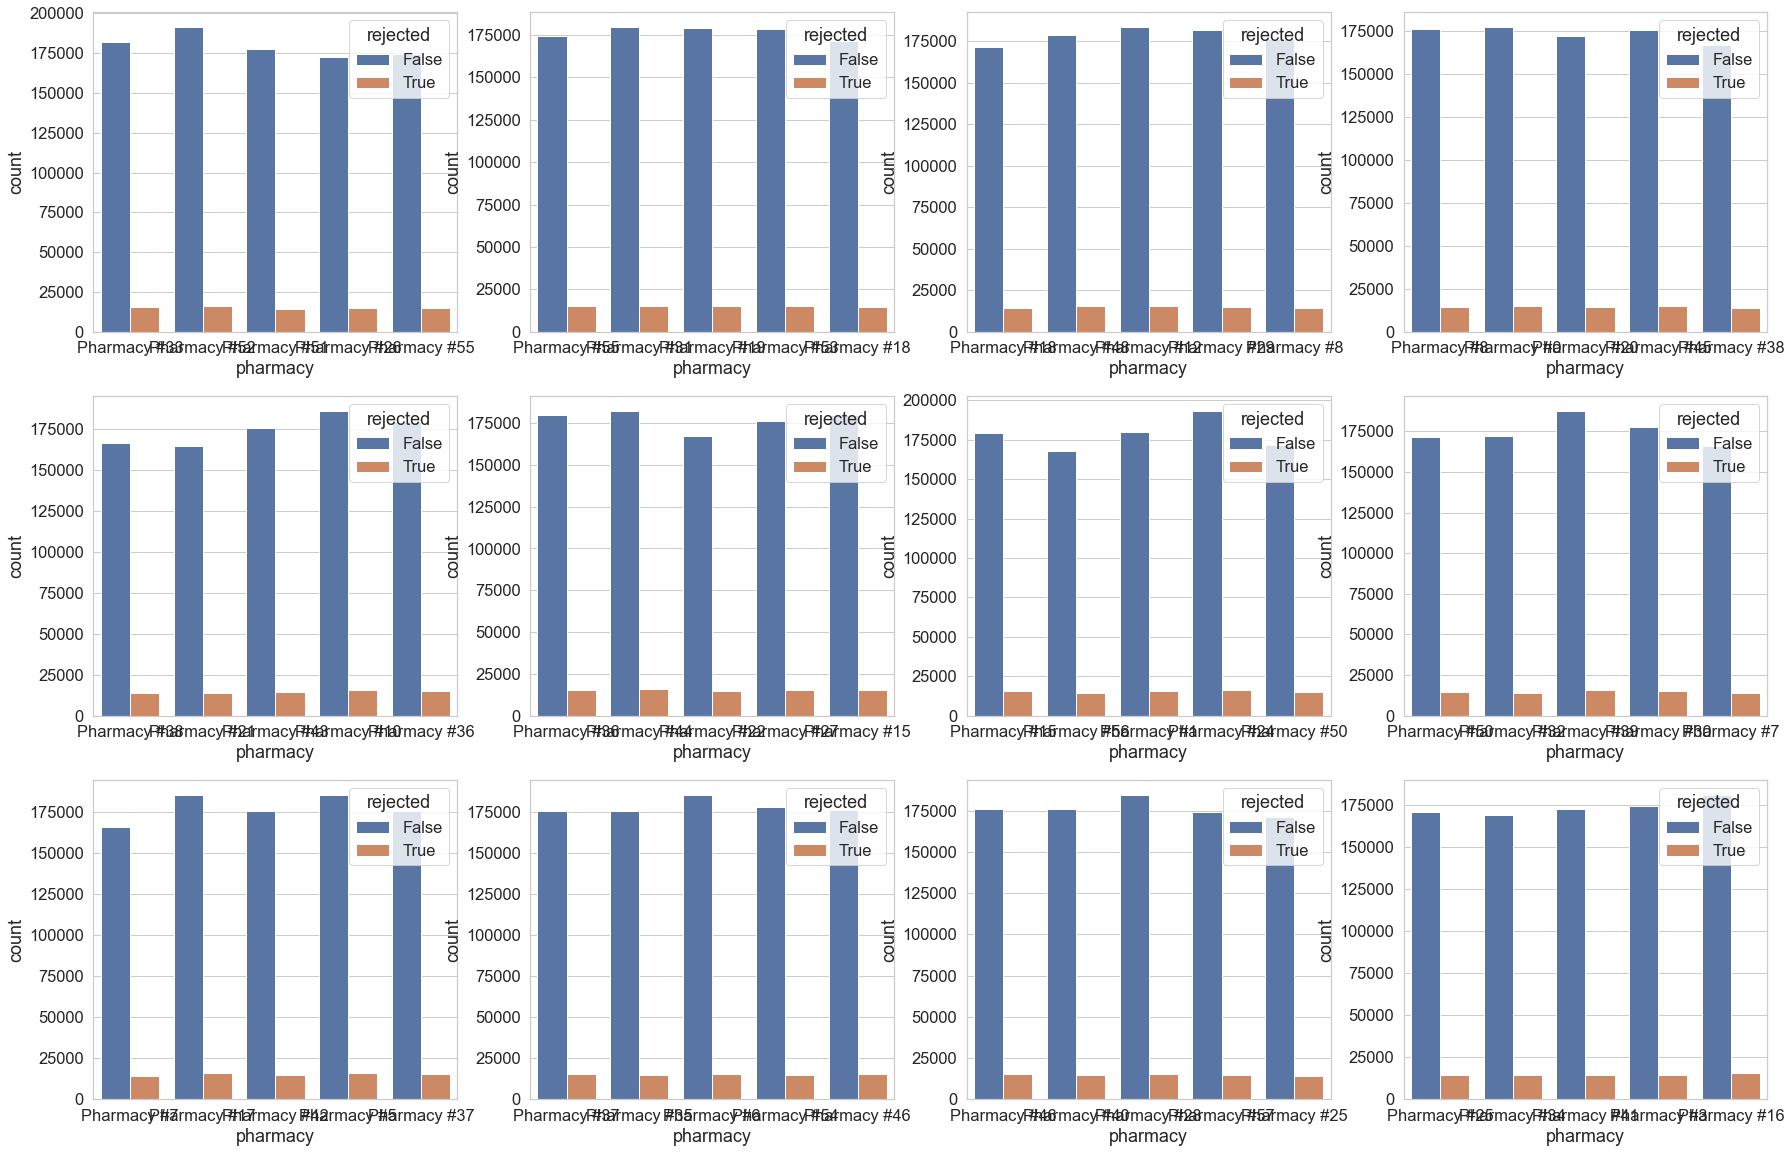

In [51]:
col_var = 'pharmacy'
vars = df_train[col_var].unique()

plot_rejected(col_var,vars)

Pharmacy does not seem to effect whether a drug is rejected or not.

**Rejected by Diagnosis**

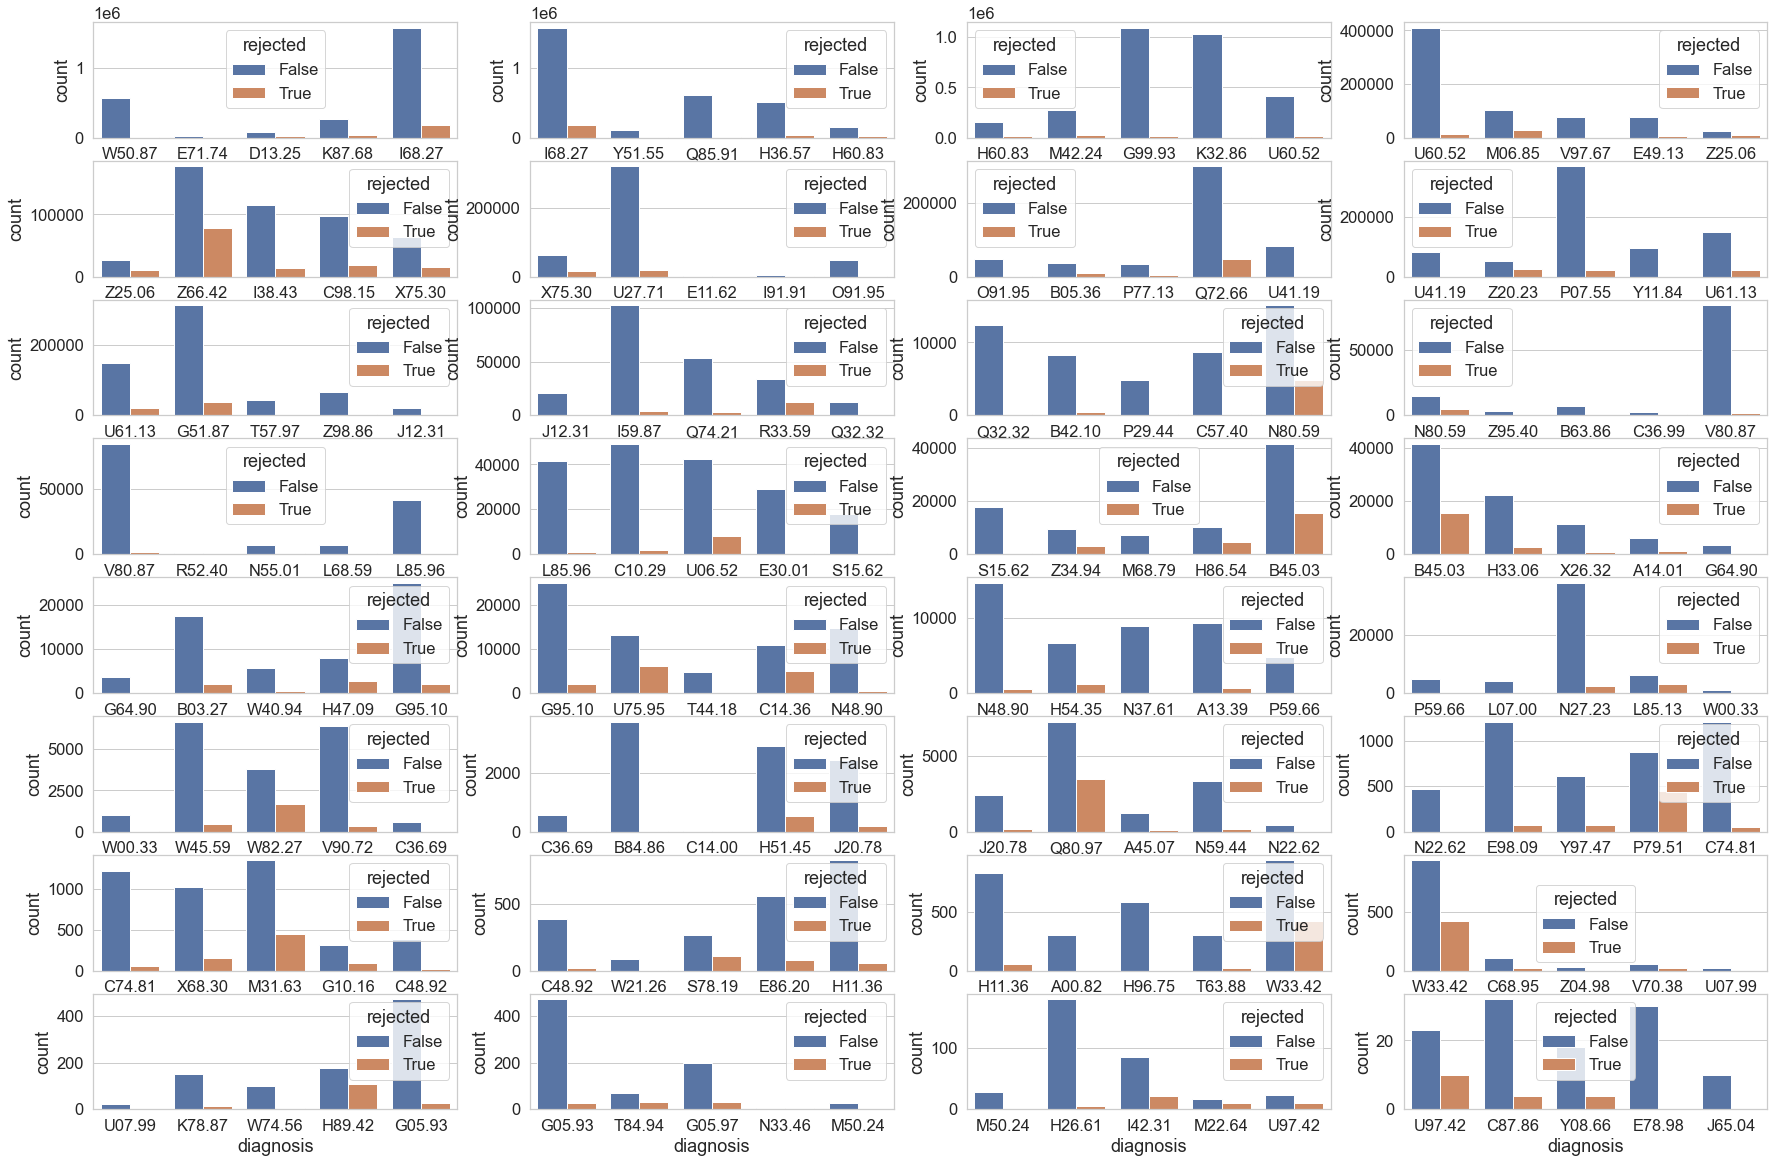

In [26]:
col_var = 'diagnosis'
vars = df_train[col_var].unique()
plot_rejected(col_var,vars)

Current diagnosises lead to a higher proportion of drugs not being accepted. P79.51 for example has a high propoertion of drugs rejected. X00.63, Z04.98, W74.56 and C14.00 is always rejected.

<AxesSubplot:xlabel='drug', ylabel='count'>

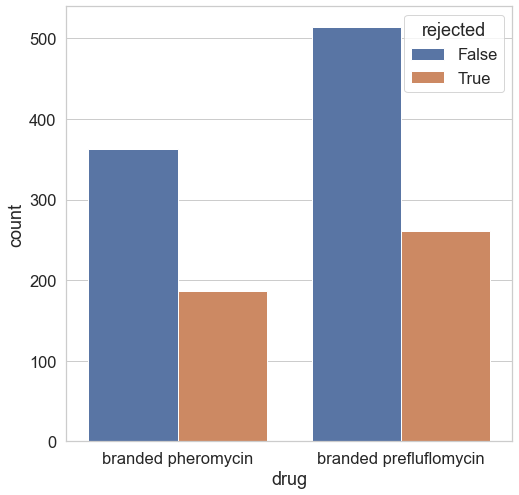

In [27]:
col_var = "diagnosis"
vars = "P79.51"
data = df_train.loc[(df_train[col_var] == vars)]
sns.countplot(x="drug", hue="rejected", data=data)

There are only two drugs associated with that diagnosis and both lead to higher rejections. The only available drugs are branded.

**Rejected by Drug**

In [52]:
def plot_rejected_by_drug(col_var,vars):
  sns.set(style='whitegrid', palette="deep", font_scale=1.5, rc={"figure.figsize": [16, 8]})
  cols = 4
  rows = int(len(vars)/(cols*cols))
  fig, axes = plt.subplots(rows, cols, figsize=(50, 30))

  all_axes = rows*cols
  xlabel_index = [k for k in range(all_axes) if k >=  all_axes - 4]
  i = 0
  for axis in range(all_axes):
    ax = axes.flat[axis]
    data = df_train.loc[(df_train[col_var] == vars[i])]
    sns.countplot(x="drug", hue="rejected", data=data,ax=ax).set(title = vars[i])
    i+=1

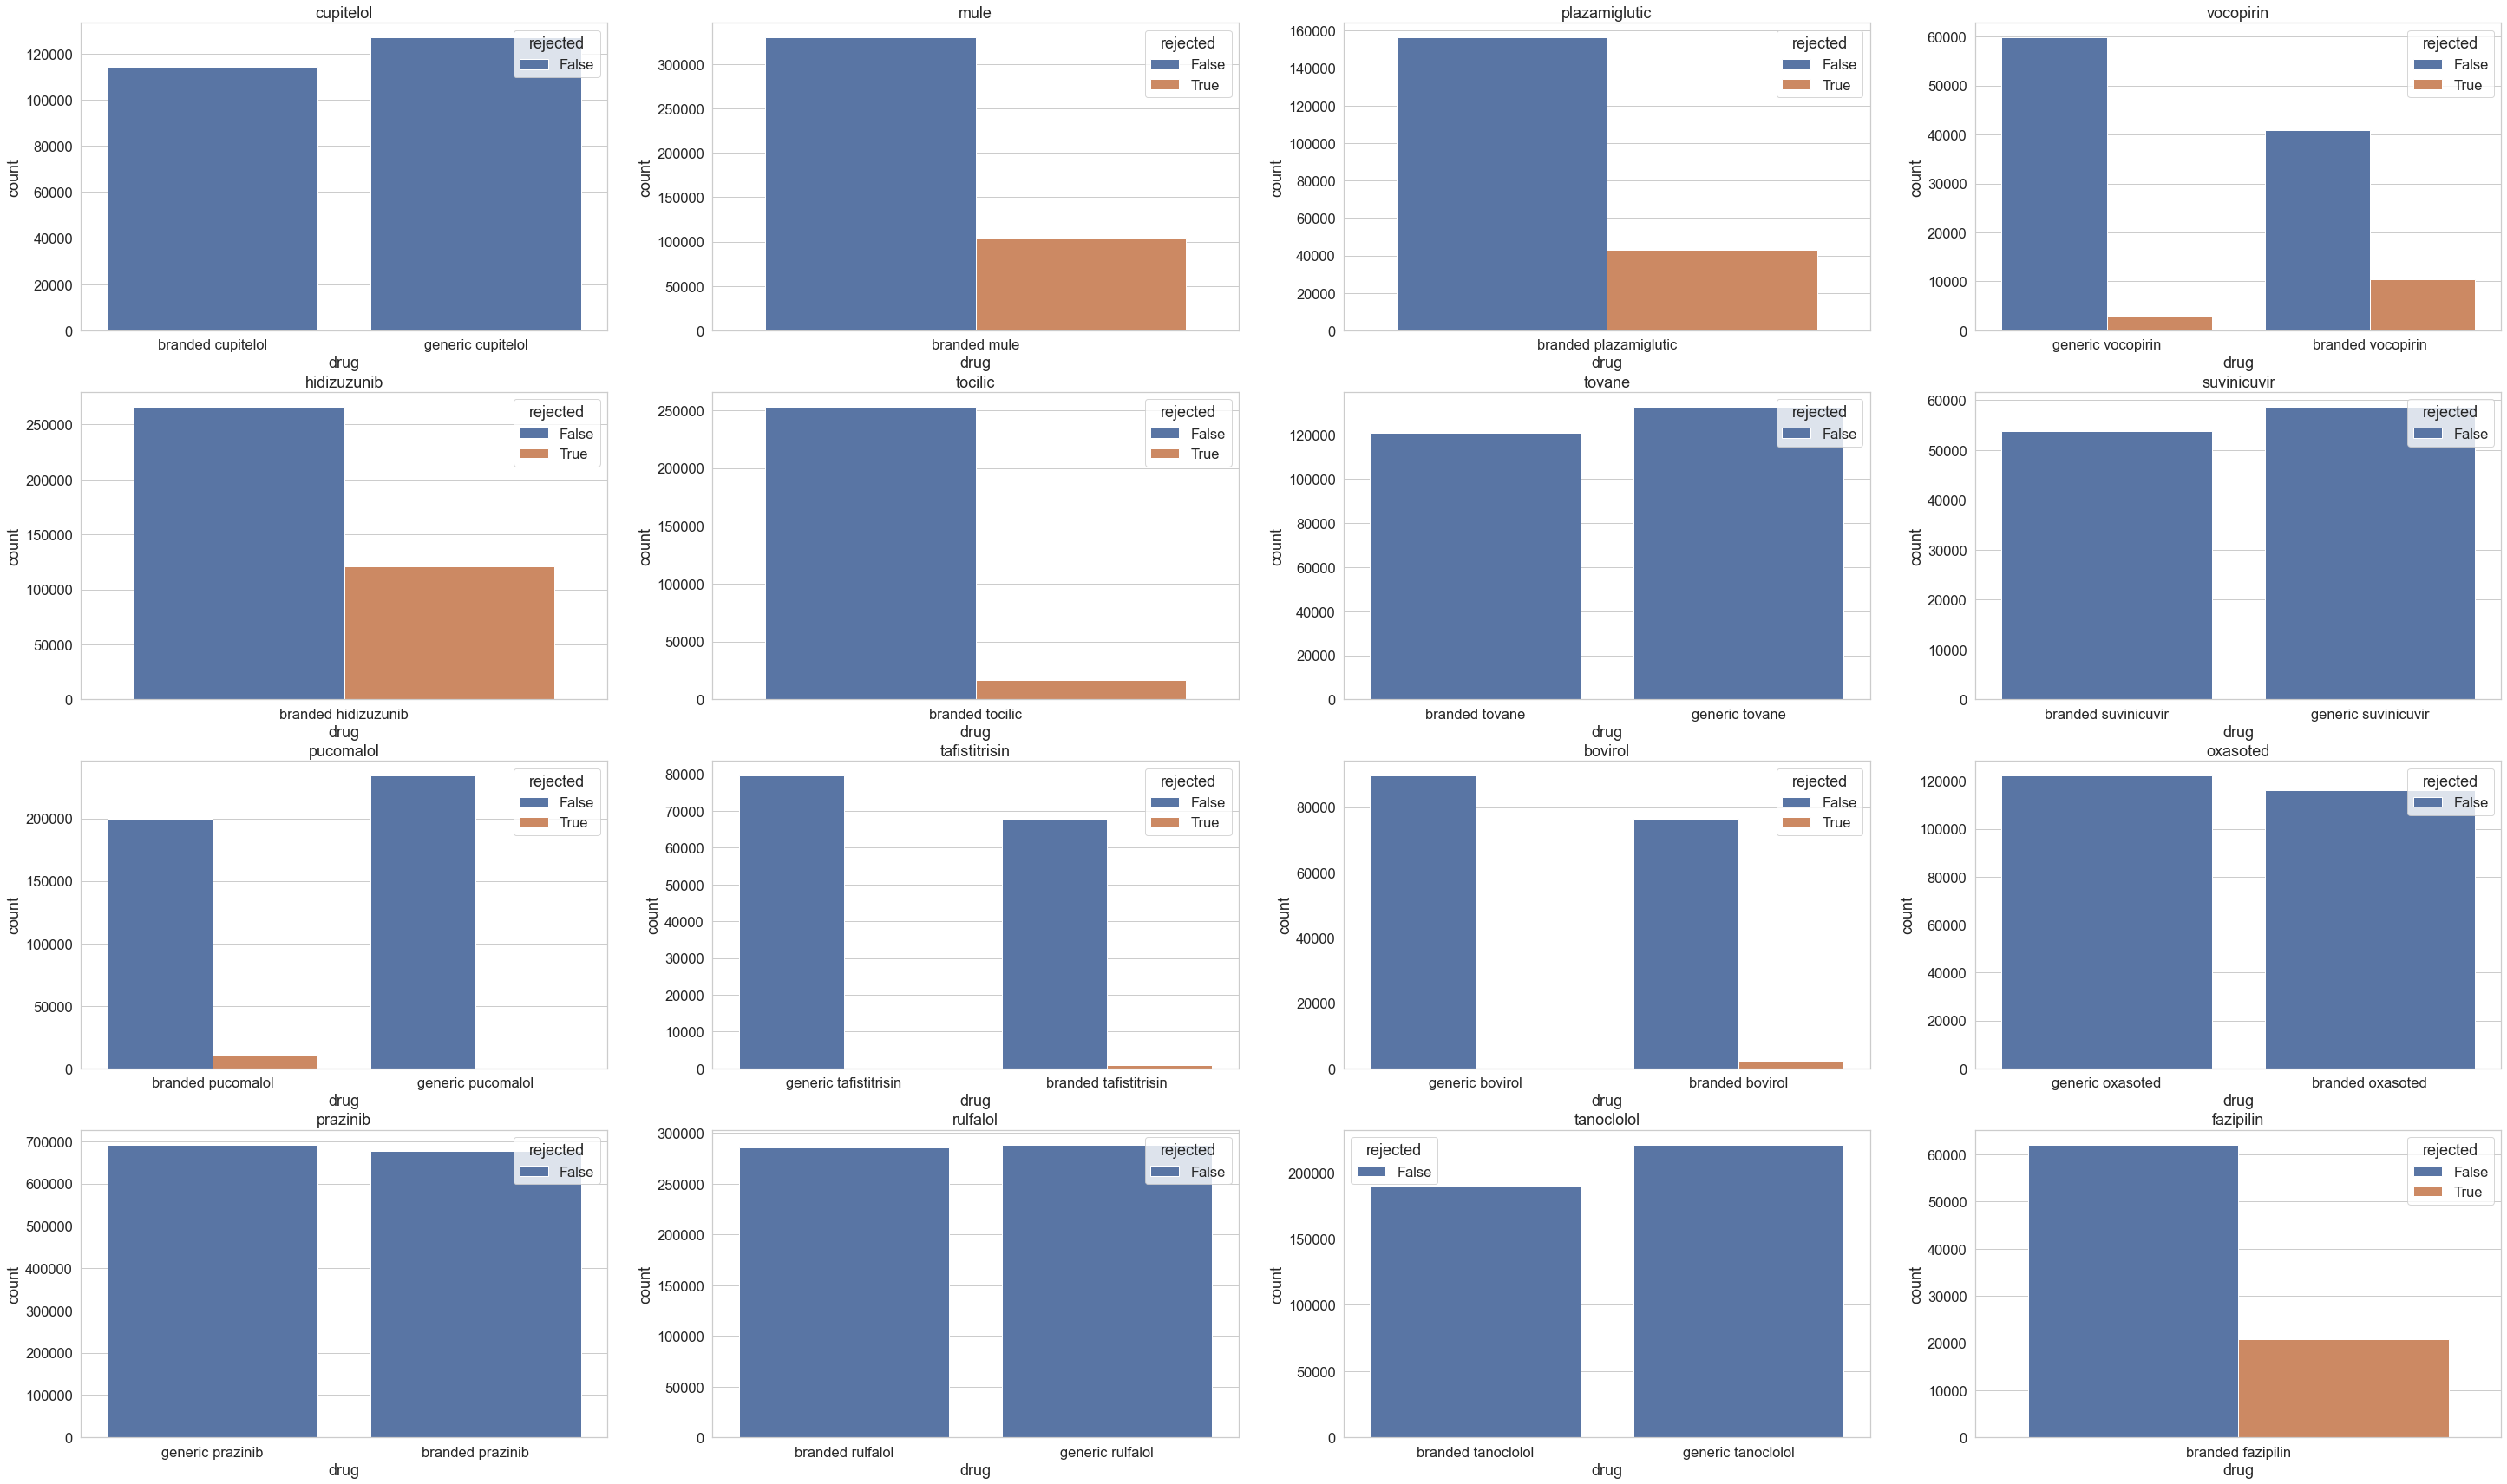

In [54]:
col_var = 'drug_type'
vars = df_train[col_var].unique()
plot_rejected_by_drug(col_var,vars)

Only branded drugs are rejected.

**Drugs by Diagnosis**

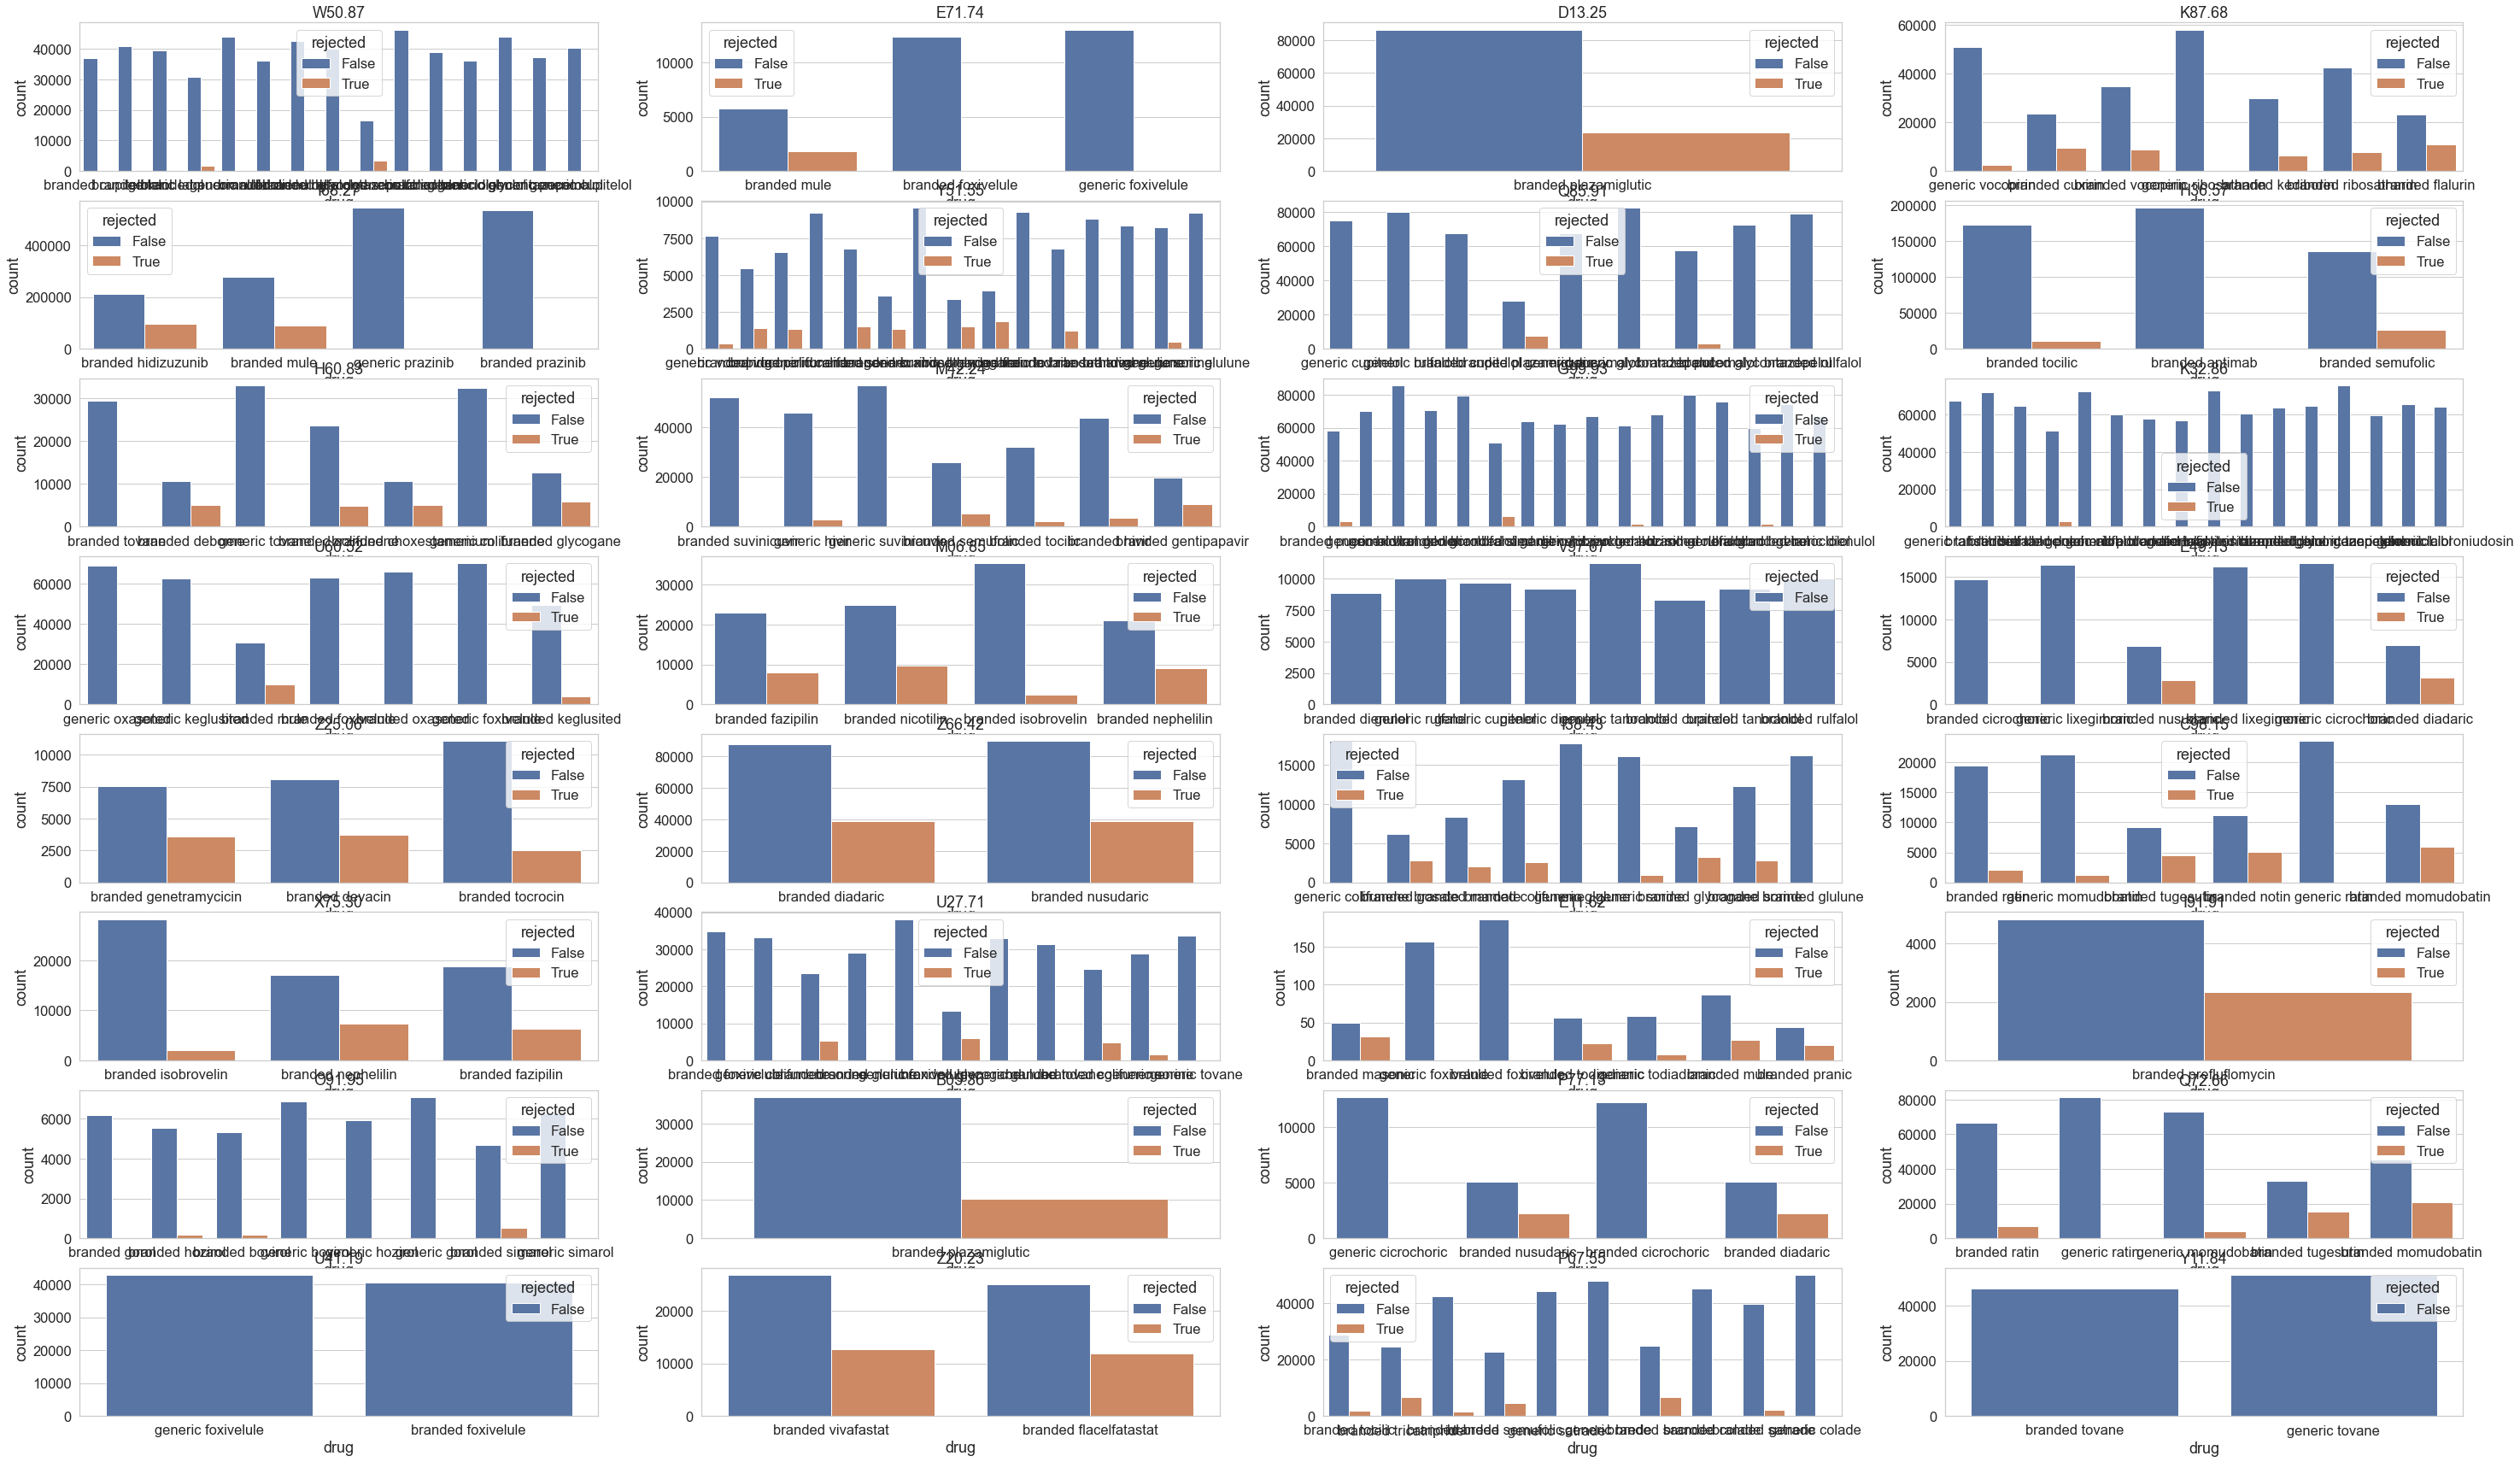

In [53]:
col_var = 'diagnosis'
vars = df_train[col_var].unique()
plot_rejected_by_drug(col_var,vars)

Each diagnosis corresponds to certain drugs. Some diagnosis have more rejected drugs than others.

Some diagnosises have a lot of drugs, some only have a few. Some diagnosis have drugs that are never rejected. 

**Rejected by Drug Group**

In [30]:
col_var = 'drug'
df_train['drug_group'] = [val.split(' ')[0] for val in df_train[col_var]]
df_train['drug_type']= [val.split(' ')[1] for val in df_train[col_var]]

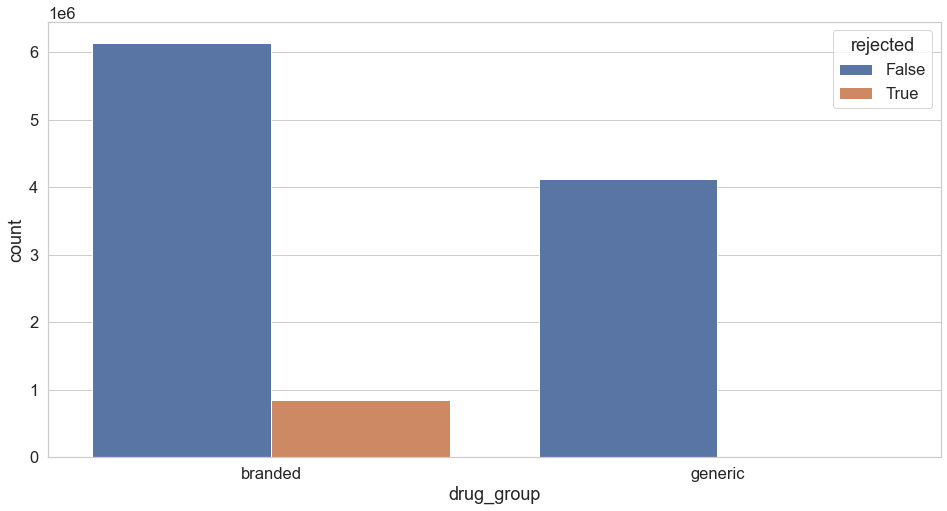

In [31]:
plot = sns.countplot(
    x = "drug_group",
    hue = "rejected",
    data = df_train
)

Only branded drugs were rejected.

**Rejected by PCN**

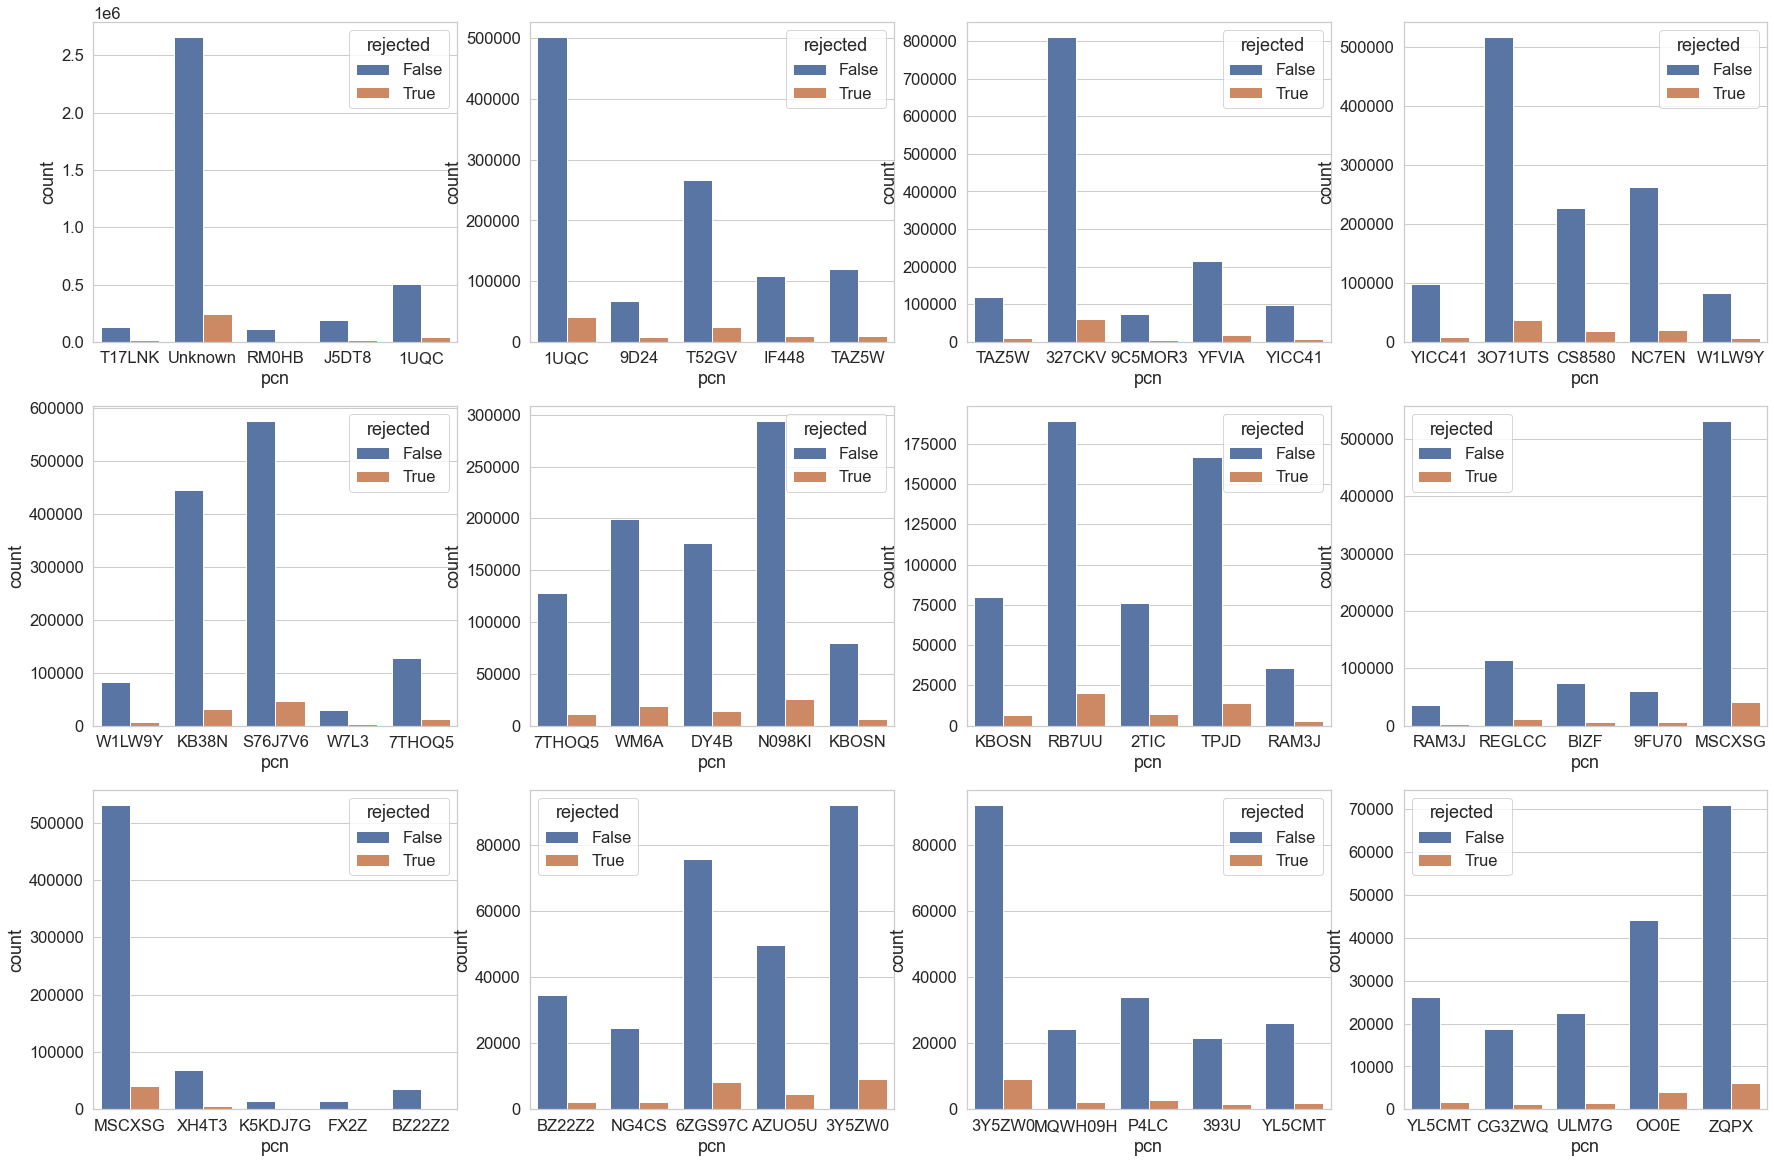

In [32]:
col_var = 'pcn'
vars = df_train[col_var].unique()
plot_rejected(col_var,vars)

Certain PCN's are less common. Some are always accepted, but don't have many data points.

**Rejected by Group**

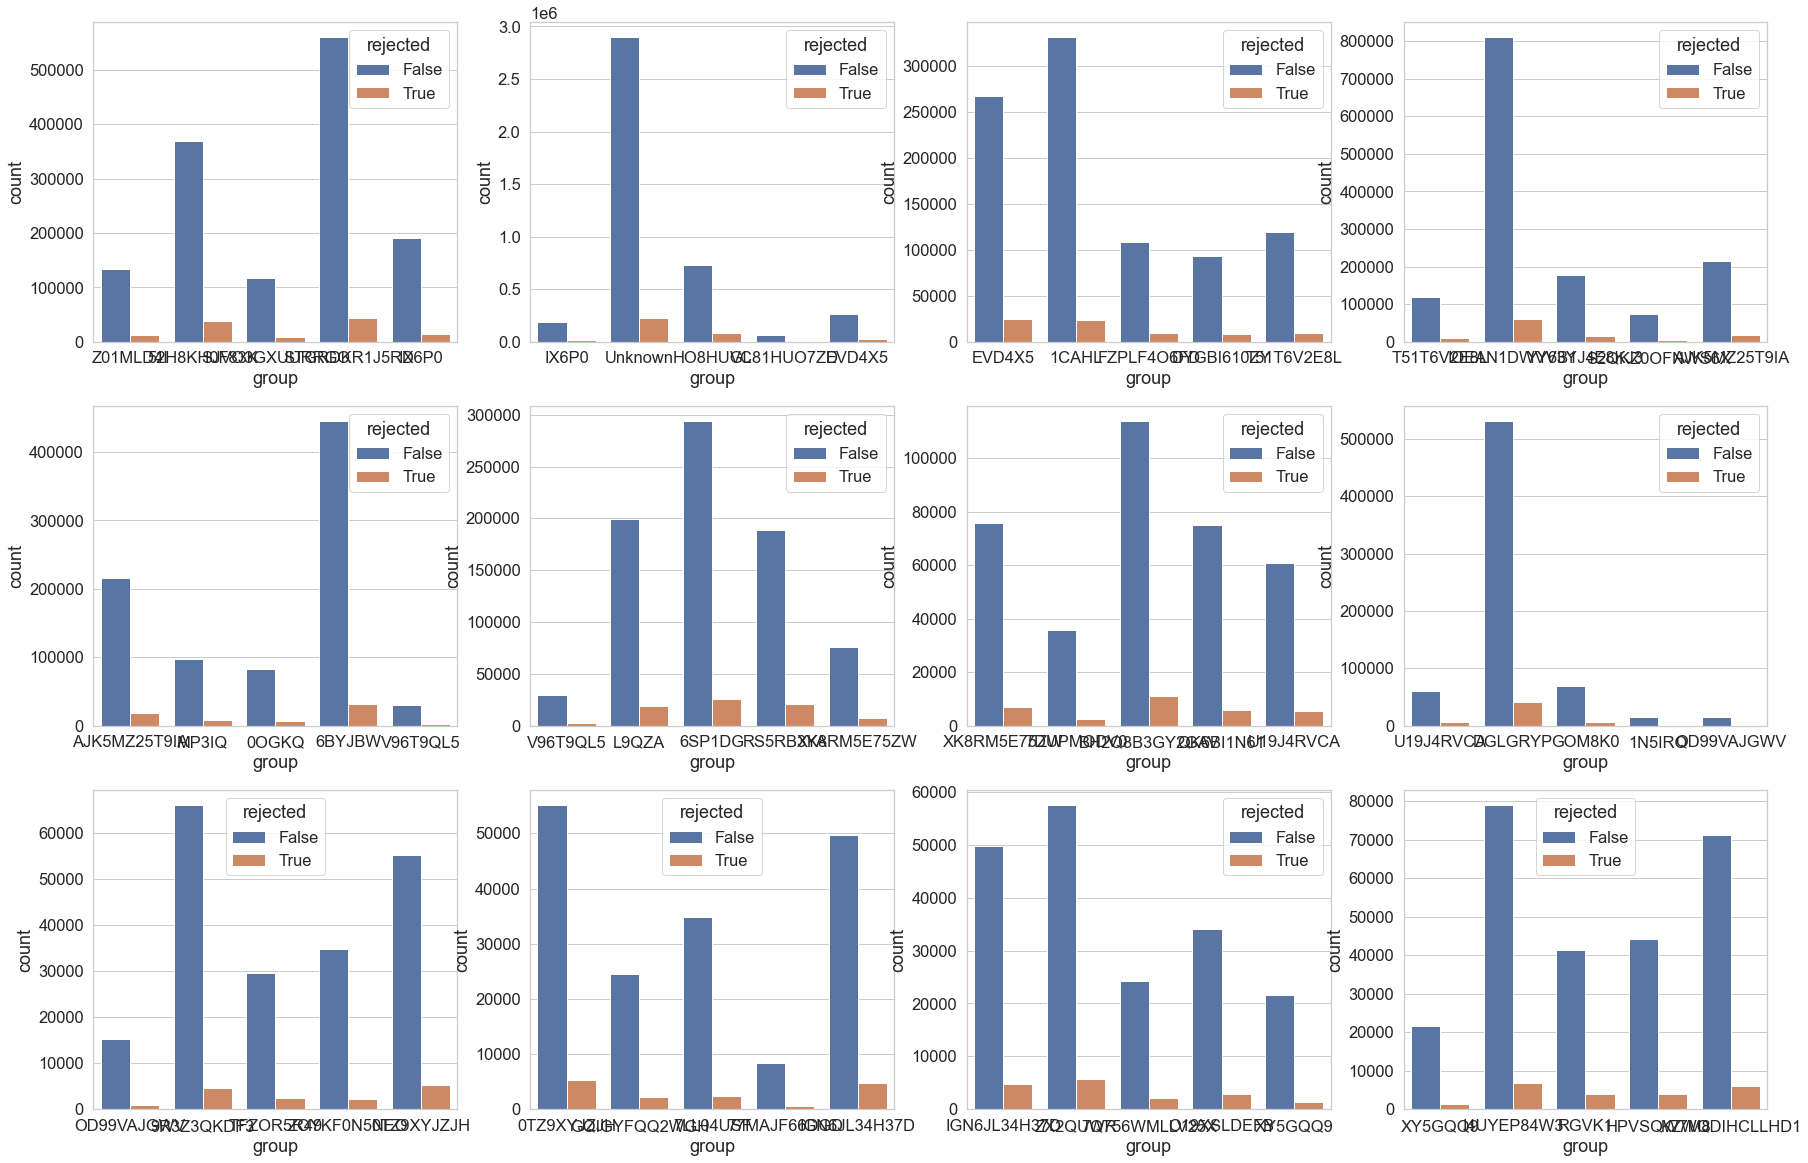

In [33]:
col_var = 'group'
vars = df_train[col_var].unique()
plot_rejected(col_var,vars)

Same findings as pcn, less drastic.

**Drug type for each drug**

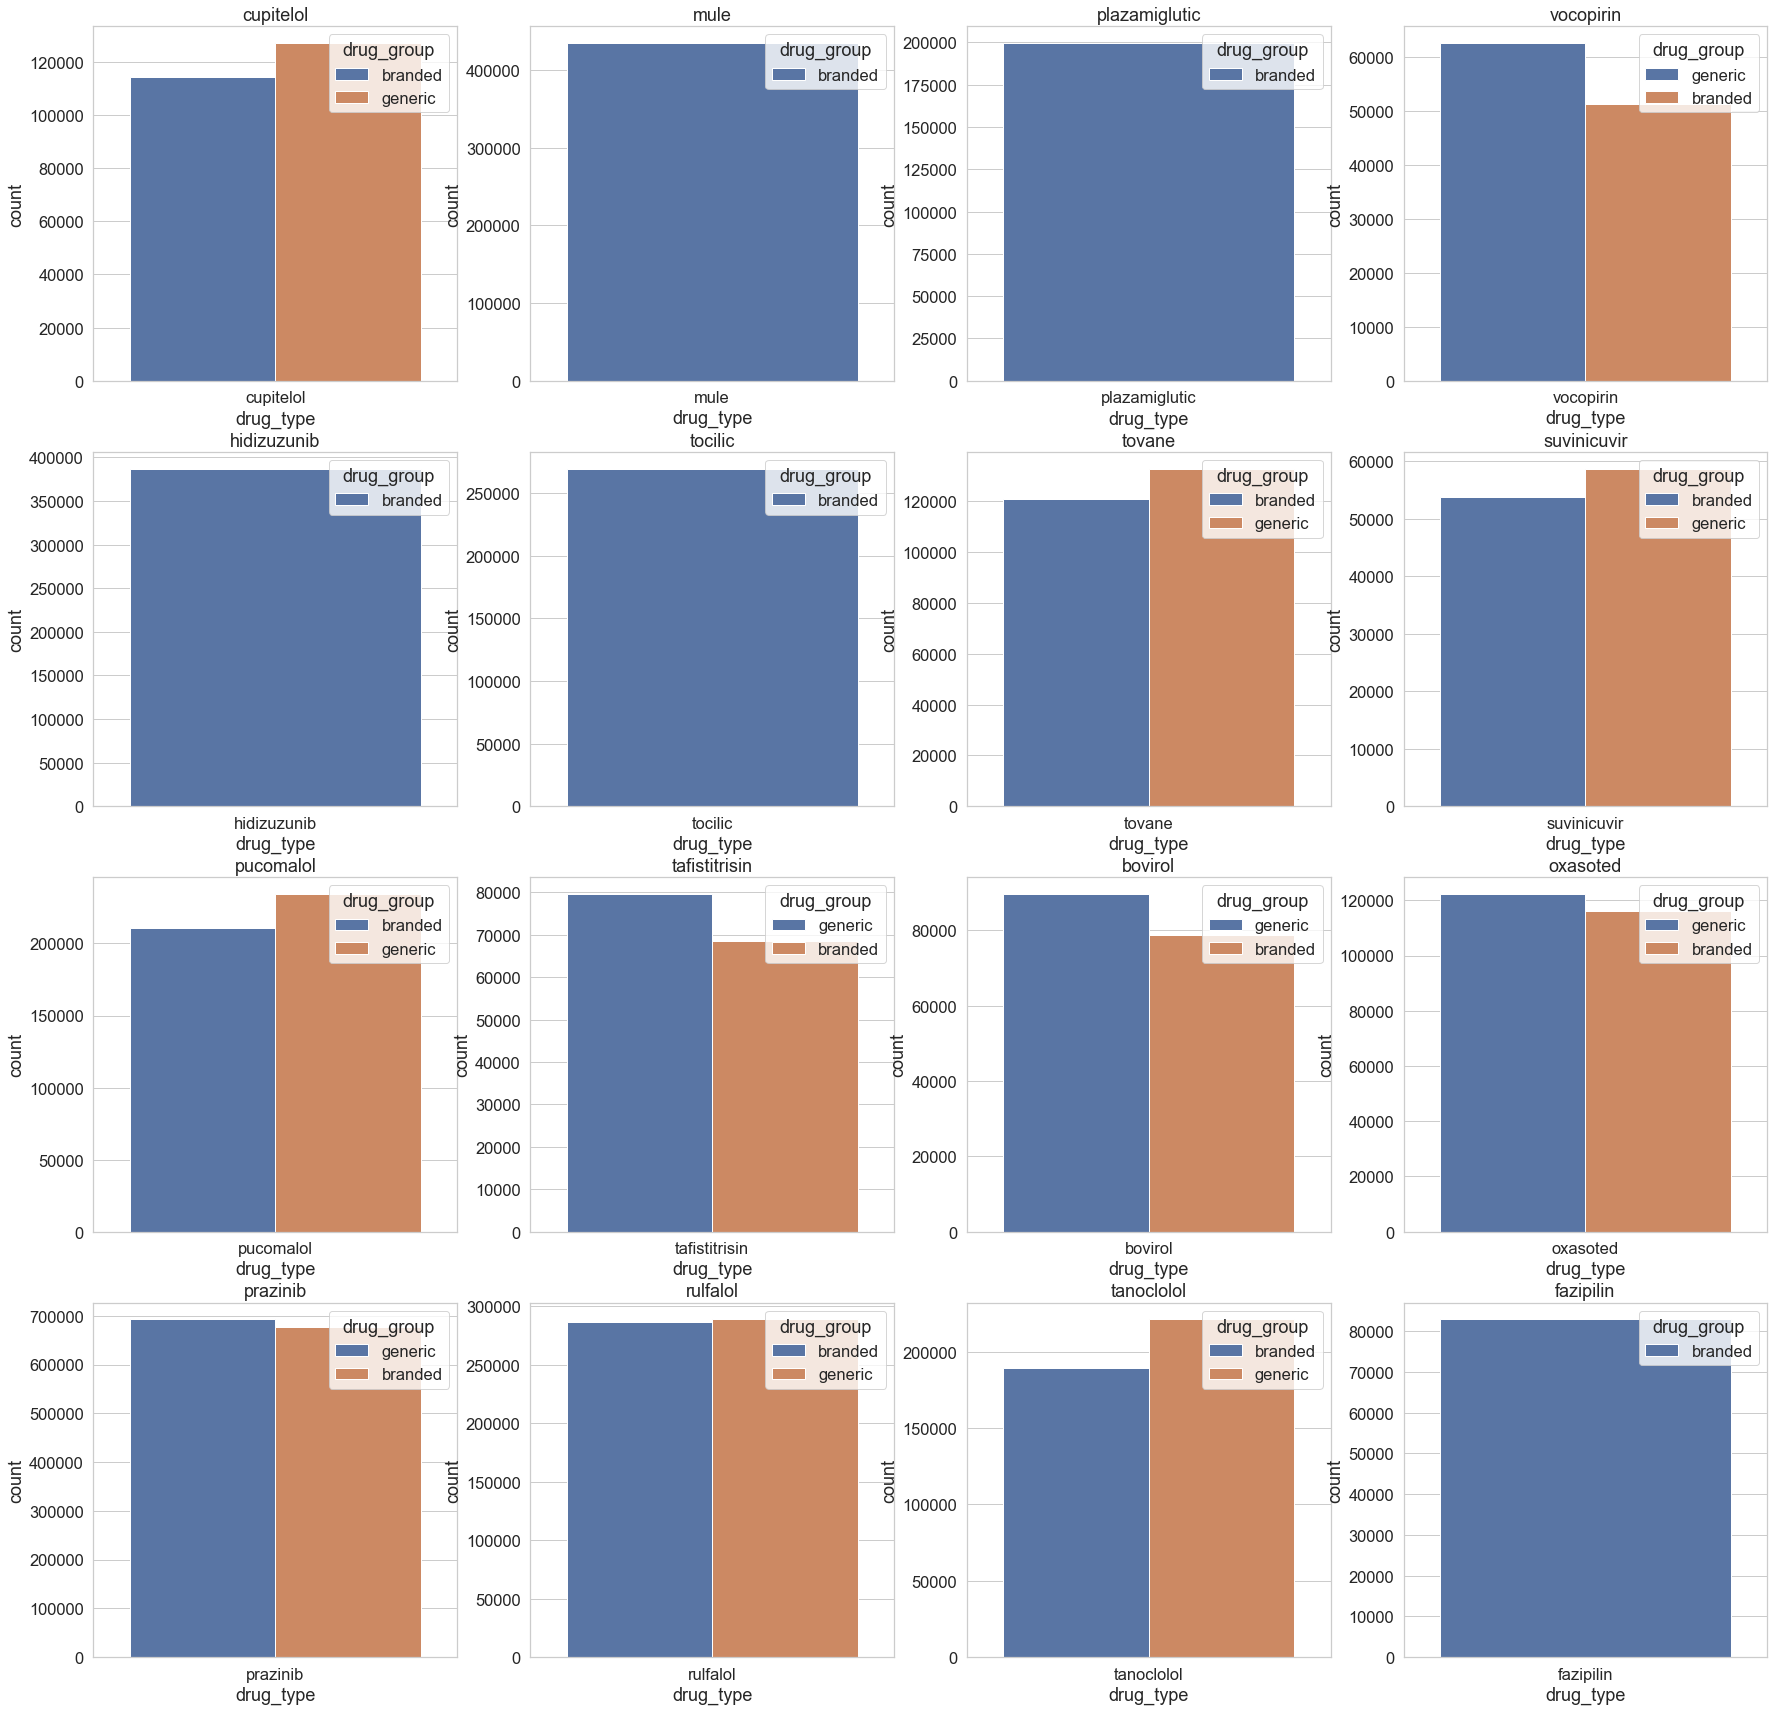

In [35]:
col_var = "drug_type"
vars = df_train[col_var].unique()
sns.set(style='whitegrid', palette="deep", font_scale=1.5, rc={"figure.figsize": [8, 8]})
cols = 4
rows = int(len(vars)/(cols*cols))
fig, axes = plt.subplots(rows, cols, figsize=(30, 30))

all_axes = rows*cols
xlabel_index = [k for k in range(all_axes) if k >=  all_axes - 4]
i = 0
for axis in range(all_axes):
  ax = axes.flat[axis]
  data = df_train.loc[(df_train[col_var] == vars[i])]
  sns.countplot(x=col_var, hue="drug_group", data=data,ax=ax).set(title = vars[i])
  i+=1

Some drugs have a branded and generic options, some are only branded.

**Rejected by BIN**

<AxesSubplot:xlabel='bin', ylabel='count'>

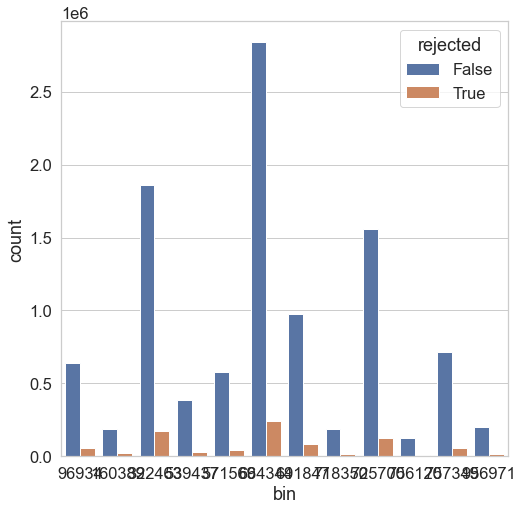

In [36]:
col_var = 'bin'
sns.countplot(x=col_var, hue="rejected", data=df_train)

Rejected varies by bin, however since each bin has unique pcn's using pcn should account for this. 